<font size=6>作业5：数据降维</font><br>
我们仍然会使用MNIST数据集来进行实验，本次实验PCA部分要求手写代码，其余部分可以调包<br>


数据预处理

In [ ]:
#读取手写数字书别.gz文件
import gzip
import numpy as np

with gzip.open('./MNIST_dataset/train-images-idx3-ubyte.gz', 'rb') as f:
    images = np.frombuffer(f.read(), np.uint8, offset=16)
    images = images.reshape(-1, 784)

with gzip.open('./MNIST_dataset/train-labels-idx1-ubyte.gz', 'rb') as f:
   labels = np.frombuffer(f.read(), np.uint8, offset=8)

import random
#建议设置相同的随机数种子，来让实验结果可以复现
random.seed(20241106)
#完成数据的预处理，每一个数字保留1000个，最后得到10000大小的数据集
labels_sample=[]
images_sample=[]
for i in range(0,10):
    #获得标签为i的索引
    labels_i=[ index for index,label in enumerate(labels) if label==i ]
    print(f"the amount of number {i} is :",len(labels_i))
    #随机找1000个
    indices_chosen=random.sample(labels_i,1000)
    images_chosen=images[indices_chosen]
    labels_chosen=labels[indices_chosen]
    #找完存起来
    images_sample.append(images_chosen)
    labels_sample.append(labels_chosen)
#揉成一个大的数据集
labels_sample=np.array([item for sublist in labels_sample for item in sublist])
images_sample=np.array([item for sublist in images_sample for item in sublist])
'''
思考：目前这样采数据，所有标签为1的都会在[1000,1999]，标签为3的都会在[3000.3999]，而没有打乱，
这样会不会影响最终的降维结果？
'''
#如果觉得有影响的话，可以打乱顺序：
'''
indices=np.arange(len(labels_sample))
np.random.shuffle(indices)
images_sample=images_sample[indices]
labels_sample=labels_sample[indices]
'''
#标准化，思考：为什么要标准化？
EX=images_sample.mean(axis=0)
sqrt_DX=images_sample.std(axis=0)
X_normalized=(images_sample-EX)/(sqrt_DX+1e-10)


降维方法

(10000, 2)
[[  1.30929418   4.54216672]
 [  7.06008094   2.50997789]
 [ 24.02095868  -9.66804388]
 ...
 [ -3.7826077    0.93915934]
 [  9.22346885 -13.12904888]
 [ -6.60114425  -0.38498494]]


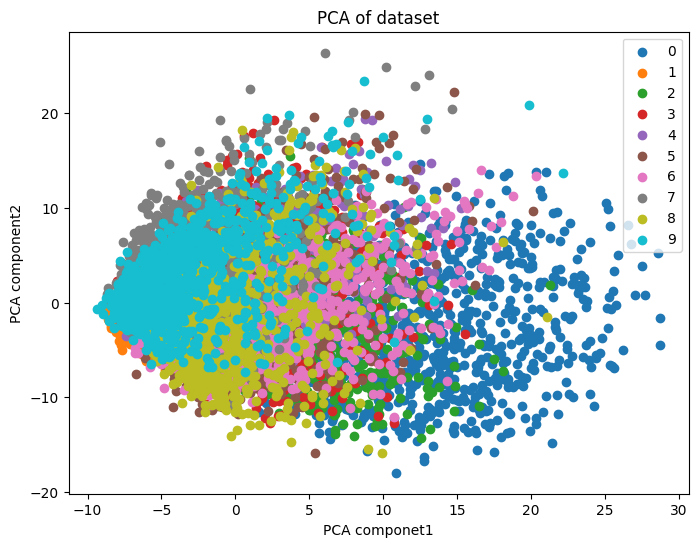

In [ ]:
#!pip install umap-learn
#没有安装umap的同学可以直接调用上面这一行来安装
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_with_annotation(X , labels , X_name='X axis' , Y_name='Y axis' , graph_name='2d graph'):
    '''
    参数说明：
    X：数据矩阵（降维后的）
    labels：标签矩阵
    X_name:X轴的名字
    Y_name:Y轴的名字
    graph_name:图像的名字
    '''
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=str(label))
    plt.xlabel(X_name)
    plt.ylabel(Y_name)
    plt.legend()
    plt.title(graph_name)
    plt.show()
#todo1:完成PCA的代码
def pca_method(X):
    #为了提供实例，我这里直接调包了，同学们需要自己手动实现PCA
    pca=PCA(n_components=2)
    X_pca=pca.fit_transform(X)
    print(X_pca.shape)
    return X_pca

#todo3:完成ISOMAP降维的代码
def isomap_method(X,k=5):
    pass
#todo4:完成LLE降维的代码
def LLE_method(X,k=5):
    pass
#todo5:完成t_sne降维的代码
def t_sne_method(X,per=5):
    pass
#todo5:完成umap降维的代码
def umap_method(X,k=5):
    pass

#todo2：绘制降维后的图像和前30个主成分的图像
plot_with_annotation(pca_method(X_normalized),labels_sample,"PCA componet1","PCA component2",'PCA of dataset')

ISOMAP 降维

In [ ]:
k_test=[5,10,20,50,80,150]

for k in k_test:
    plot_with_annotation(isomap_method(X_normalized,k=k),labels_sample,"此处记得改","此处记得改",'此处记得改')


LLE降维

In [ ]:
k_test=[5,10,20,50,80,150]

for k in k_test:
    plot_with_annotation(LLE_method(X_normalized,k=k),labels_sample,"此处记得改","此处记得改",'此处记得改')

t-sne降维

In [ ]:
k_test=[5,10,20,50,80,150]

for k in k_test:
    plot_with_annotation(t_sne_method(X_normalized,per=k),labels_sample,"此处记得改","此处记得改",'此处记得改')

umap降维

In [ ]:
k_test=[5,10,20,50,80,150]

for k in k_test:
    plot_with_annotation(umap_method(X_normalized,k=k),labels_sample,"此处记得改","此处记得改",'此处记得改')